## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1.

> ### a. Write a function which takes three arguments: p, q and v. The function should return the probability of having the sum of scores equal to  under probabilities p and q of the coins. v is one of 3, 4 and 5.

In [2]:
def prob_equal_to_v(p, q, v):
    #Creates an array of 1000 elements, with a random probability of p, 1-p; either 2 or 3
    suzanne_prob = np.random.choice([2,3], size = 1000, p = [p, 1-p], replace = True) #2 for head, 3 for tail, replace = True means to that values 2 and 3 can be selected multiple time throughout the sample size of 1000
    #Creates an array of 1000 elements, with a random probability of q, 1-q; either 1 or 2
    jim_prob = np.random.choice([1,2], size = 1000, p = [q, 1-q], replace = True) #1 for head, 2 for tail

    sum_probabilities = suzanne_prob + jim_prob
    
    favourable_outcome_v = np.count_nonzero(sum_probabilities == v)
    total_outcomes = len(sum_probabilities)
    probability = favourable_outcome_v / total_outcomes
    return probability

In [3]:
print(prob_equal_to_v(0.55, 0.24, 3))
print(prob_equal_to_v(0.55, 0.24, 4))
print(prob_equal_to_v(0.55, 0.24, 5))
print("------")
print(prob_equal_to_v(0.55, 0.24, 3) + prob_equal_to_v(0.55, 0.24, 4) + prob_equal_to_v(0.55, 0.24, 5))

0.122
0.53
0.344
------
1.03


> ### b. Write a function which takes three arguments: p, q and X, where X is a list(or numpy array) of values. The function should return the log-likelihood of p and q given X.

In [4]:
#Global array for the X in the table
X = np.array([3] * 148 + [4] * 529 + [5] * 323)

In [5]:
def log_likelihood(p, q, X):
    vectorized_prob = np.vectorize(prob_equal_to_v) #vectorization for better computation time
    return np.sum(np.log(vectorized_prob(p, q, X)))

log_likelihood(0.55, 0.24, X) #testing the function

-990.2691440927197

>### c. For the following experiment results, calculate the log-likelihood of representative combinations of  and in the range (0, 1), and visualize it:

<img src="./assets/images/table.png">

In [6]:
possible_p = np.linspace(0, 1, 30) #possible p values
possible_q = np.linspace(0, 1, 30) #possible q values

experiment_arr = np.concatenate([np.full(148, 3, dtype=np.int32),
                                 np.full(529, 4, dtype=np.int32),
                                 np.full(323, 5, dtype=np.int32)])

> ### d. Investigate the log-likelihood from the previous part. Does it have a single maximum or more? What are the consequences?

In [7]:
log_lhood = np.array([[log_likelihood(p, q, experiment_arr) for q in possible_q] for p in possible_p])

<ipython-input-5-860b81f64048>:3: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(vectorized_prob(p, q, X)))


Text(0.5, 0, 'loglikelihood')

/opt/anaconda3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


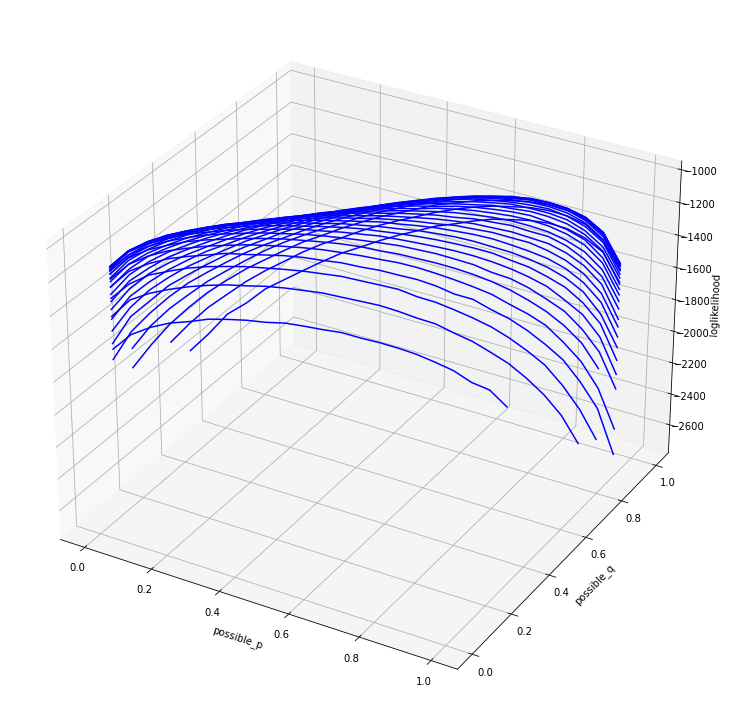

In [8]:
fig = plt.figure(figsize = (20,13))
ax = fig.gca(projection='3d')
ax.plot_wireframe(possible_p, possible_q, log_lhood, color='blue', ccount=0)

ax.set_xlabel("possible_p")
ax.set_ylabel("possible_q")
ax.set_zlabel("loglikelihood")

In [9]:
ind = np.unravel_index(np.argmax(log_lhood), log_lhood.shape)
print('The index of maximum value in likelihood is {}'.format(ind))

#MLE - Maximum Likelihood estimate
mle_p = possible_p[ind[0]] #maximum likelihood estimate of p
mle_q = possible_q[ind[1]] #maximum likelihood estimate of q

arr_max = np.argwhere(log_lhood == np.max(log_lhood)) #Testing that how many max value of log-likelihood has
print('We can see that it has {} maximum\n'.format(len(arr_max)))

print('Maximum likelihood estimate of p is {:.2f}'.format(mle_p))
print('Maximum likelihood estimate of q is {:.2f}'.format(mle_q))

The index of maximum value in likelihood is (8, 16)
We can see that it has 1 maximum

Maximum likelihood estimate of p is 0.28
Maximum likelihood estimate of q is 0.55


### Task 2

### Calculate and show a KDE for the data described in the following histogram; explainyour choice of the bandwidth parameter:

<img src="./assets/images/kde_table.png">

In [10]:
data = np.concatenate([np.full(402, 20.3),
                       np.full(590, 32.7),
                       np.full(10, 45.2),
                       np.full(9, 57.6),
                       np.full(39, 70.0),
                       np.full(116, 82.4),
                       np.full(157, 94.9),
                       np.full(115, 107.3),
                       np.full(50, 119.7),
                       np.full(12, 132.1)])
data

array([ 20.3,  20.3,  20.3, ..., 132.1, 132.1, 132.1])

<AxesSubplot:title={'center':'KDE of data'}, ylabel='Density'>

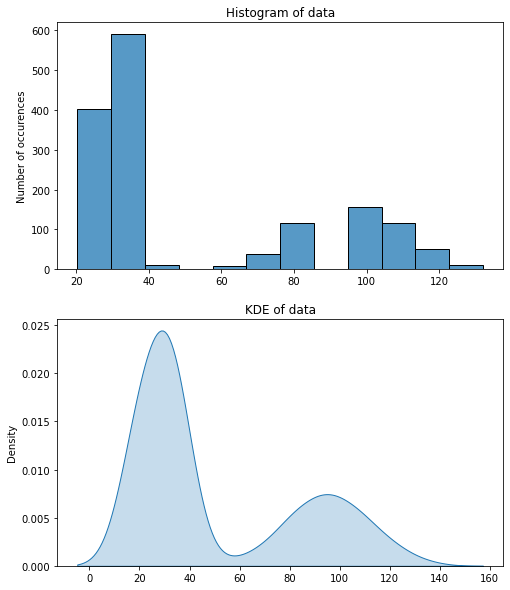

In [11]:
fig, axs = plt.subplots(2,figsize = (8,10))
axs[0].set_title("Histogram of data")
axs[0].set_ylabel("Number of occurences")
sns.histplot(x=data, ax = axs[0])

axs[1].set_title("KDE of data")
sns.kdeplot(x=data, fill=True,ax = axs[1],bw_method=0.25) #best value which I have found

We know that, a small bandwidth leads to undersmoothing, however huge bandwidth leads to oversmoothing. Considering this fact, I test several parameters for bandwidth, and I have found out that the best value for bandwidth is 0.25